In [16]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

In [17]:
data = pd.read_csv(r'IMDB Dataset.csv')

In [18]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
def remove_punctuations(text):
    text = str(text).lower()
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a normalized sentence
    normalized_text = ' '.join(words)

    return normalized_text

data["review"] = data["review"].apply(remove_punctuations)

In [6]:
data.head(2)

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production br br filming tech...,positive


In [7]:
encoder = LabelEncoder()
data['sentiment'] = encoder.fit_transform(data['sentiment'])

In [8]:
data.head(2)

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production br br filming tech...,1


<Figure size 500x500 with 0 Axes>

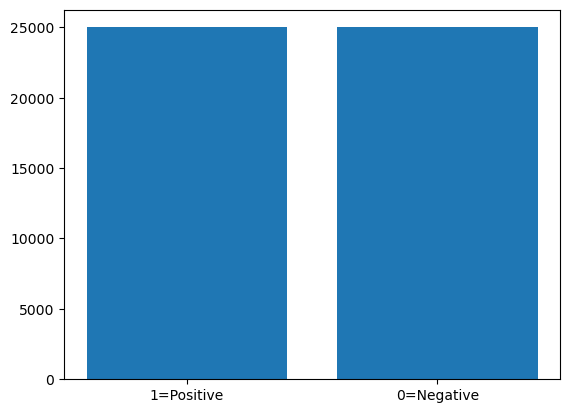

In [9]:
label_cnt = data['sentiment'].value_counts()  # tuple to show as barplot
labels = ('1=Positive', '0=Negative') 

plt.figure(figsize=(5, 5))
fig, ax = plt.subplots()
ax.bar(labels, label_cnt)
plt.show()

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf_vectorizer.fit(data['review'])
data_x = tfidf_vectorizer.transform(data['review'])

sp.save_npz("tfidf_matrix.npz", data_x)

In [11]:
data_x = sp.load_npz("tfidf_matrix.npz")
data_x

<50000x52078 sparse matrix of type '<class 'numpy.float64'>'
	with 4723651 stored elements in Compressed Sparse Row format>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data['sentiment'], test_size=0.2, random_state=42)

In [13]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = logreg.score(X_test, y_test)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Accuracy:", accuracy_logreg)
print("F1-score:", f1_logreg)

Accuracy: 0.8975
F1-score: 0.8998534440644846


In [14]:
mnb_model = MultinomialNB()

mnb_model.fit(X_train.toarray(), y_train)
y_pred_mnb = mnb_model.predict(X_test.toarray())

accuracy_mnb = mnb_model.score(X_test.toarray(), y_test)
f1_mnb = f1_score(y_test, y_pred_mnb)

print("Accuracy:", accuracy_mnb)
print("F1-score:", f1_mnb)

Accuracy: 0.8668
F1-score: 0.8660498793242156


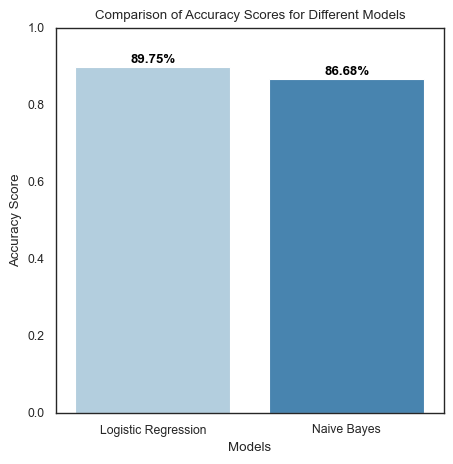

In [15]:
models = ['Logistic Regression', 'Naive Bayes']
accuracy_scores = [accuracy_logreg, accuracy_mnb]

sns.set(style='white', context='paper')
sns.set_palette("muted")

plt.figure(figsize=(5, 5))
ax = sns.barplot(x=models, y=accuracy_scores, palette="Blues")
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')


for i, v in enumerate(accuracy_scores):
    ax.text(i, v+0.01, '{:.2%}'.format(v), color='black', fontweight='bold', ha='center')

plt.show()